**2023 La Serena School Data Science**
#  CNN Intro


*N. Hernitschek, 2023*


This Jupyter notebook gives an intro to Convolutional Neural Networks.



---
## Contents

* [Python installation](#second-bullet)
* [Python Refresher](#second-bullet)
* [Good Coding Style](#third-bullet)
* [Our own CNN code](#fourth-bullet)
* [Summary](#fifth-bullet)

## 1. Python installation <a class="anchor" id="first-bullet"></a>

Everyone will need to have the proper software environment in order to be able to participate in the project.  

If you don't have Python 3.x (e.g. Python 3.7., 3.8 or 3.9) already installed, please follow the steps below.
If you already have a Python 3.x installation, make sure you have the packages numpy, scipy, matplotlib, scikit-learn installed; otherwise, install them using `pip`.
The goal of this is having a working Python3 environment with the aforementioned packages. We will install more packages later on.

### Miniconda

1. Install Miniconda (skip step 1 if you already have an Anaconda Python3 installation)

	* Either...download and install the relevant Miniconda file from here: https://docs.conda.io/en/latest/miniconda.html
	* OR... use Terminal command line installation
		* Download the right one for your architecture
			* Mac: `wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh`
			* Linux: `wget -q https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh`
			* Windows (untested): `wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe`

		* `bash Miniconda3-latest-Linux-x86_64.sh -b`
		* `rm Miniconda3-latest-Linux-x86_64.sh` (careful with “rm”)
        
        
2. Open a **new** terminal window, and make sure your `$PATH` variable points to the Anaconda installation. You can do this by typing

    `[~]$ which python`
    
    The result should show the path to the newly-installed Anaconda folder, e.g. `/usr/bin/python`
    
    
3. If you have problems with step 2, then you may not have added Anaconda to you Python path during installation. How to do this depends on whether you use BASH or TCSH (if you don't know what that means, you are probably using BASH).

    I use BASH, so have the following line added to my `.bash_profile` file
    
    `
    export PATH="$HOME/opt/miniconda3/bin:$PATH"
    `

    If you use TCSH instead, you will need the following in your `.tcshrc` file:                                                                                                                                
    `
    set path=(/Users/gtr/opt/anaconda3/bin $path)
    `

    Now repeat step 2.

### Python environment

If using Anaconda, I recomment using a Python environment.

1. Create a new Python environment for this project: `conda create -n autoencoder_project python=3.8 numpy scipy matplotlib scikit-learn nb_conda`. Press `y` to proceed when asked.


2. This will create a conda environment that can be activated by `conda activate autoencoder_project`


3. Open a `jupyter notebook`


4. Set the Kernel

   * when opening a new notebook: click `New` and select `Python [conda env:astr8070]`  
   * when opening an existing notebook (like this tutorial): click `Kernel` --> `Change Kernel` --> `Python [conda env:autoencoder_project]`
   
   
5. When necessary, you can deactivate this Python environment with `conda deactivate`   
  

My package versions are as follows. If you run into problems that I am not having, resolving package version differences would be a good place to start debugging. You can check your package versions with:


In [ ]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")


We install additional pages like that:

```
$ conda install -c astropy astroquery
```
```    
$ pip3 install corner
```
    
After installation, let's check the version of everything again.

In [ ]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")


## 2. Python Refresher <a class="anchor" id="second-bullet"></a>

### Getting Started with Python

If you don't know *any* Python experience at all, this project may be pretty tough. However, with a little Python experience, this refresher might be helpful for you.  

These tutorials from Jake VanderPlas (a contributor to astroML and a co-author of our textbook) are also very helpful:

- [A Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

In addition, these general tutorials can be recommended:
https://docs.python.org/3/tutorial/
https://swcarpentry.github.io/python-novice-inflammation/


Python is heavily documented online. Usually, if you need a command that performs a specific task, you’ll find something on the web. 


---

### Interfacing with Python

You can run Python code by 1) starting Python on the command line (**remember to activate the class python environment first!**): 

    $ python
    
or 2) using a web-based interactive interface [Jupyter](http://jupyter.org/).

For the project, I recommend using Jupyter notebooks for your own code.

To start the notebook app, run on the command line:

    $ jupyter notebook &
    
This will pop up a web page in your default browser and show the Dashboard where you can navigate to a particular notebook or open a new one.  You can also open a notebook directly with 

    $ jupyter notebook Lecture_X.ipynb &
   
If you are creating a new notebook, click on `New` at the top-right of the page and select `Python [conda env:astr8070]`. When opening an existing notebook, click `Kernel` --> `Change Kernel` --> `Python [conda env:astr8070]`

---
In case Jupyter notebooks cannot be executed, you have to install the packages first:
    
    $ pip3 install jupyter
 
    $ python3 -m ipykernel install --user

 

### Working with jupyter notebooks

Notebooks have two primary cell types: 'Markdown' and 'Code'. The Markdown cells just contain text (like this cell).  The Code cells are meant to be altered and executed.  

To execute a cell in the notebook, type '**shift-return**'. If you see a `*` in the bracket left of the cell or a `Busy` in the tab title, it means the command is in the process of running, and you need to wait for it to finish. This happens frequently for code cells.

The notebook is autosaved, so that when you return to a notebook, everything is the same as you left it. If you want to reset it, you can do “revert to checkpoint”.  If you save it yourself, you will create a checkpoint, and the original version will be unavailable.

--- 

Here are some useful commands to get you started (# followed by text indicates a comment and not what you type)!

    In [ ]: ?          # basic help function.  Pops open a sub-frame at the bottom of page.  
                         Close with "x".
    
    In [ ]: %quickref  # Pops open a quick reference card
    
    In [ ]: ! 	       # spawning out to the operating system; 
                         e.g files=!ls will fill the variable files 
                         with a list of files in your directory.

--- 

Jupyter also contains a number of [“magic” commands](https://ipython.org/ipython-doc/dev/interactive/magics.html).
Two examples are

    In [ ]: %matplotlib inline  # makes plots within the web browser instead of popping up a new window
    
    In [ ]: %whos               # lists the vectors, etc. that you have defined.
    
    In [ ]: %timeit func.       # times a function `func` that you have defined

Jupyter also has lots of [keyboard shortcuts](https://ipython.org/ipython-doc/1/interactive/notebook.html#keyboard-shortcuts) – the main one is shift-enter to run a cell.

In [ ]:
Let's make sure that everything is working by making a simple plot:

In [ ]:
# magic command to make the figure pop up below instead of in a new window
%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# invoke pyplot in matplotlib, give it an alias
import matplotlib.pyplot as plt  
import numpy as np

x = np.linspace(0, 3*np.pi, 300)

y = np.sin(x)
y2 = np.sin(x**2)

plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(which='major')
plt.legend(loc='lower left');

## optional extras
plt.minorticks_on()
plt.tick_params(which='both', direction='in', tick2On=True)

You can change both the [marker/line styles](http://matplotlib.org/examples/lines_bars_and_markers/) and [colors](http://matplotlib.org/api/colors_api.html). Also worth exploring are the colors in the [palettable library](https://jiffyclub.github.io/palettable/), where you can see the colors displayed at [http://colorbrewer2.org/](http://colorbrewer2.org/). Several color cycles are available that are color-blind safe (and printer-friendly).


## 3. Good Coding Style <a class="anchor" id="third-bullet"></a>

1. Give each piece of code an informative name, and separate the words in the name by
underscores. So, for instance, if you have code to populate the area on a sphere at random,
call that code populate_sphere_at_random.

2. Break up code in smaller meaningful pieces that can easily be reused. Write functions.

3. Comment your code well. When you adopt code from other sources (i.e: the internet), it is
good practice to reference where it came from in comments as well.

4. When commiting changed files, always add a comment like in the example above. 

## 4. Our own CNN code<a class="anchor" id="fourth-bullet"></a>


To better understand the internals of a CNN, we here start with creating our own CNN code.
It is not as fast and comfortable as using a professional neural network library (such as keras/tensorflow), but it allows for more easily understanding and manipulating the internals of a CNN.




In [1]:
import numpy as np

def relu(x):
  if x < 0:
    return 0
  else:
    return x

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

def loss(y_pred):
  """ Entropy Loss Like """
  return -np.log(y_pred)

In [2]:
class Convolution2D:
  def __init__(self, k1, b1, stride=1, padding=0):
    """
      - k1: (6, 5, 5) kernels # six kernels of size 5x5
      - b1: (6) bias
    """
    self.k1 = k1
    self.b1 = b1
    self.stride = stride
    self.padding = padding

  def feedforward(self, img):
    """
      - img: (28, 28) image
    """

    N, k1_height, _ =  self.k1.shape

    C1_height = int((img.shape[0] - k1_height + 2 * self.padding) / self.stride) + 1

    # Initialize C
    C1 = np.zeros((N, C1_height, C1_height), dtype=np.float64)
    dC1S1 = np.zeros(C1.shape, dtype=np.float64)

    for n in range(N):
      for i in range(C1_height):
        for j in range(C1_height):
          region = img[i+stride-1:(i+stride-1 + k1_height), j+stride-1:(j+stride-1 + k1_height)]
          S1_nij = np.sum(region * self.k1[n]) + self.b1[n]
          C1[n, i, j] = relu(S1_nij)
          dC1S1[n, i, j] = 1 if S1_nij > 0 else 0

    return C1, dC1S1


class Convolution3D:
  def __init__(self, k2, b2, stride=1, padding=0):
    """
      - k2:   (12, 6, 5, 5) kernels
      - b2:   (12) bias
    """
    self.k2 = k2
    self.b2 = b2
    self.stride = stride
    self.padding = padding

  def feedforward(self, P1):
    """
      - P1: (6, 12, 12) image
    """
    M, N, k2_height, _ = self.k2.shape
    C2_height = int((P1.shape[1] - k2_height + 2 * self.padding) / self.stride) + 1 # Size of output using floor

    C2 = np.zeros((M, C2_height, C2_height), dtype=np.float64)
    dC2S2 = np.zeros(C2.shape, dtype=np.float64)
    dS2P1 = np.zeros(P1.shape + C2.shape, dtype=np.float64)

    for m in range(M):
      for u in range(C2_height):
        for v in range(C2_height):
          region = P1[0:N, u+self.stride-1:(u+self.stride-1 + k2_height), v+self.stride-1:(v+self.stride-1 + k2_height)]
          S2_muv = np.sum(region * self.k2[m]) + self.b2[m]
          C2[m, u, v] = relu(S2_muv)
          dC2S2[m, u, v] = 1 if S2_muv > 0 else 0
          dS2P1[0:N, u:(u + k2_height), v:(v + k2_height), m, u, v] = self.k2[m]

    return C2, dC2S2, dS2P1


In [4]:
# Pooling layers


import numpy as np

class MaxPool:
  def __init__(self, size=2):
    self.size = size

  def feedforward(self, C):
    N, C_height, _ = C.shape
    P_height = int(C_height / self.size)

    P = np.zeros((N, P_height, P_height), dtype=np.float64)
    indices = np.zeros((N, P_height, P_height), dtype=(np.int64, 2))

    for n in range(N):
      for i in range(P_height):
        for j in range(P_height):
          #region = C[n, (2 * i):(2 * i + 2), (2 * j):(2 * j + 2)]
          region = C[n, (self.size * i):(self.size * i + self.size), (self.size * j):(self.size * j + self.size)]
          P[n, i, j] = np.max(region)
          local_indices = np.unravel_index(np.argmax(region), region.shape)
          indices[n, i, j] = [2 * i + local_indices[0], 2 * j + local_indices[1]]

    return P, indices


For the following, you will have to install MNIST, the data set of hand-written numbers:

`pip3 install mnist`



In [13]:
# CNN (including Feedforward and Backpropagation)


# this is where all the derivations come from:
# https://medium.com/@ngocson2vn/a-gentle-explanation-of-backpropagation-in-convolutional-neural-network-cnn-1a70abff508b
# --> a clear case where one has to make all the derivations before on paper to write the code...

import math
import mnist
import numpy as np

class CNN:
  def __init__(self, N, M):
    u1 = 0.1
    u2 = 0.1
    u = 0.1
    self.k1 = np.random.uniform(low=-u1, high=u1, size=(N, 5, 5))
    self.b1 = np.random.uniform(low=-u1, high=u1, size=(N))
    self.k2 = np.random.uniform(low=-u2, high=u2, size=(M, N, 5, 5))
    self.b2 = np.random.uniform(low=-u2, high=u2, size=(M))
    self.w = np.random.uniform(low=-u, high=u, size=(10, M * 16))
    self.b = np.random.uniform(low=-u, high=u, size=(10))


  def feedforward(self, img):
    ## Convolution Layer C1
    conv1 = Convolution2D(self.k1, self.b1, stride=1, padding=0)
    C1, dC1S1 = conv1.feedforward(img)

    ## Pooling Layer P1
    maxpool = MaxPool(size=2)
    P1, I1 = maxpool.feedforward(C1)

    ## Convolution Layer C2
    conv2 = Convolution3D(self.k2, self.b2, stride=1, padding=0)
    C2, dC2S2, dS2P1 = conv2.feedforward(P1)

    ## Pooling Layer P2
    P2, I2 = maxpool.feedforward(C2)

    ## FC Layer
    f = P2.flatten()
    O = softmax(np.dot(self.w, f) + self.b)

    return O


  def train(self, train_images, train_labels, test_images, test_labels, epoch, lr):
    N = self.k1.shape[0]
    M = self.k2.shape[0]
    epochs = []
    avg_losses = []
    accuracies = []

    for ep in range(epoch):
      # Shuffle the training data
      permutation = np.random.permutation(len(train_images))
      train_images = train_images[permutation]
      train_labels = train_labels[permutation]
      for img, label in zip(train_images, train_labels):

        ############################################################
        # Feedforward phase                                        #
        ############################################################

        ## Convolution Layer C1
        conv1 = Convolution2D(self.k1, self.b1, stride=1, padding=0)
        C1, dC1S1 = conv1.feedforward(img)

        ## Pooling Layer P1
        maxpool = MaxPool(size=2)
        P1, I1 = maxpool.feedforward(C1)

        ## Convolution Layer C2
        conv2 = Convolution3D(self.k2, self.b2, stride=1, padding=0)
        C2, dC2S2, dS2P1 = conv2.feedforward(P1)
        
        print('N')
        print(N)
        
        print ('shape of dS2P1')
        print(dS2P1.shape)
        #(6, 12, 12, 12, 8, 8)

        ## Pooling Layer P2
        P2, I2 = maxpool.feedforward(C2)

        ## FC Layer
        f = P2.flatten()
        O = softmax(np.dot(self.w, f) + self.b)


        ############################################################
        # Backpropagation phase                                    #
        ############################################################

        ## 1. Calculate gradients of parameters in the FC layer
        dLS = np.copy(O)
        dLS[label] = O[label] - 1
        dLb = np.copy(dLS)
        #print('label')
        #print(label)
        #print('dLS')
        #print(dLS)
        #print('O')
        #print(O)
        
        
        # dLS is the derivative of the loss function w.r.t. to S
        # as a loss function, cross-entropy is used, leading to the derivative
        # the loss function is a function of the output at the given label
        # -log(prediction)
        
        dLw = np.zeros(O.shape + f.shape, dtype=np.float64)
        for i in range(O.shape[0]):
          dLw[i, :] = O[i] * f
        dLw[label, :] = (O[label] - 1) * f

        dLf = np.zeros(f.shape, dtype=np.float64)
        for j in range(f.shape[0]):
          dLf[j] = np.sum(dLS * self.w[:, j])

        dLP2 = dLf.reshape(P2.shape)

        ## 2. Calculate gradients of parameters in the C2 layer

        ### 2.1. Calculate dLC2
        dLC2 = np.zeros(C2.shape, dtype=np.float64)

        for m in range(P2.shape[0]):
           for x in range(P2.shape[1]):
             for y in range(P2.shape[2]):
               umax, vmax = I2[m, x, y]
               dLC2[m, umax, vmax] = dLP2[m, x, y]

        ### 2.2. Calculate dLS2
        dLS2 = dLC2 * dC2S2

        ### 2.3. Calculate dLb2 and dLk2
        dLb2 = np.zeros(self.k2.shape[0], dtype=np.float64)
        dLk2 = np.zeros(self.k2.shape, dtype=np.float64)
        for m in range(self.k2.shape[0]):
          dLb2[m] = np.sum(dLS2[m])
          for n in range(self.k2.shape[1]):
            for p in range(self.k2.shape[2]):
              for q in range(self.k2.shape[3]):
                dLk2[m, n, p, q] = np.sum(dLS2[m] * P1[n][p:(p + C2.shape[1]), q:(q + C2.shape[2])])

        

        ## 3. Calculate gradients of parameters in the C1 layer

        ### 3.1. Calculate dLP1
        dLP1 = np.zeros(P1.shape, dtype=np.float64)
        for n in range(P1.shape[0]):
          for r in range(P1.shape[1]):
            for s in range(P1.shape[2]):
              dLP1[n, r, s] = np.sum(dLS2 * dS2P1[n, r, s])


        ### 3.2. Calculate dLC1
        dLC1 = np.zeros(C1.shape, dtype=np.float64)
        for n in range(P1.shape[0]):
           for r in range(P1.shape[1]):
             for s in range(P1.shape[2]):
               imax, jmax = I1[n, r, s]
               dLC1[n, imax, jmax] = dLP1[n, r, s]

        ### 3.3. Calculate dLS1
        dLS1 = dLC1 * dC1S1

        ### 3.4. Calculate dLb1 and dLk1
        dLb1 = np.zeros(self.k1.shape[0], dtype=np.float64)
        dLk1 = np.zeros(self.k1.shape, dtype=np.float64)
        for n in range(self.k1.shape[0]):
          dLb1[n] = np.sum(dLS1[n])
          for g in range(self.k1.shape[1]):
            for h in range(self.k1.shape[2]):
              dLk1[n, g, h] = np.sum(dLS1[n] * img[g:(g + C1.shape[1]), h:(h + C1.shape[2])])


        ## 4. Update parameters
        self.k1 = self.k1 - lr * dLk1
        self.b1 = self.b1 - lr * dLb1

        self.k2 = self.k2 - lr * dLk2
        self.b2 = self.b2 - lr * dLb2

        self.w  = self.w  - lr * dLw
        self.b  = self.b  - lr * dLb


      losses = []
      acc = 0
      for img, label in zip(test_images, test_labels):
        O = self.feedforward(img)
        losses.append(-np.log(O[label]))
        acc += 1 if np.argmax(O) == label else 0
      losses = np.array(losses)
      
      epochs.append(ep + 1)
      avg_losses.append(losses.mean())
      accuracy = 100 * acc / len(test_labels)
      accuracies.append(accuracy)
      print("Epoch: {}, validate_average_loss: {}, validate_accuracy: {:02.2f}%".format(ep + 1, losses.mean(), accuracy))

    return (epochs, avg_losses, accuracies)

We now train our CNN. 

**Caution:** This implementation is pretty slow. Training the CNN can take 1 hour or more.
I suggest to **not** start this now...
Rather, for plotting, we use the saved (pickled) `model_saved.bin`.

A **general advice**: Training a CNN, like training any other kind of machine learning algorithm, takes longer than applying it. Thus after successful training, one should always save the trained model. This will not only ensure reasonable execution speed for applying the model, but also ensure that each time the model is applied to data indeed the same model is used.

In [14]:
# Training the Convolutional Neural Network

import numpy as np
#from cnn import CNN
import matplotlib.pyplot as plt
import pickle

np.set_printoptions(edgeitems=100, linewidth=200000)

cnn = CNN(6, 12)

train_images = (mnist.train_images() / 255) - 0.5
train_labels = mnist.train_labels()

test_images = (mnist.test_images() / 255) - 0.5
test_labels = mnist.test_labels()

stats = cnn.train(train_images[:10000], train_labels[:10000], test_images[:1000], test_labels[:1000], 10, 0.005)
epochs = stats[0]
avg_losses = stats[1]
accuracies = stats[2]

with open("model.bin", "wb") as f:
  pickle.dump(cnn, f)

fig = plt.figure()
plt.subplots_adjust(hspace=0.5)

g1 = fig.add_subplot(2, 1, 1, ylabel="Loss", xlabel="Epoch")
g1.plot(epochs, avg_losses, label="Avg loss", color="red")
g1.legend(loc="center")

g2 = fig.add_subplot(2, 1, 2, ylabel="Accuracy", xlabel="Epoch")
g2.plot(epochs, accuracies, label="Accuracy", color="green")
g2.legend(loc="center")

plt.show()

N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
6
dLS
[ 0.09289592  0.10643395  0.09213795  0.10733155  0.10502804  0.09070528 -0.90547862  0.10378355  0.0896216   0.11754078]
O
[0.09289592 0.10643395 0.09213795 0.10733155 0.10502804 0.09070528 0.09452138 0.10378355 0.0896216  0.11754078]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
1
dLS
[ 0.09414466 -0.89659159  0.08996675  0.1111333   0.10637824  0.09181566  0.09878234  0.09827787  0.08918887  0.11690389]
O
[0.09414466 0.10340841 0.08996675 0.1111333  0.10637824 0.09181566 0.09878234 0.09827787 0.08918887 0.11690389]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
0
dLS
[-0.90957176  0.10707329  0.09706845  0.10899069  0.10829419  0.09170947  0.0983039   0.09372713  0.09116434  0.11324031]
O
[0.09042824 0.10707329 0.09706845 0.10899069 0.10829419 0.09170947 0.0983039  0.09372713 0.09116434 0.11324031]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
1
dLS
[ 0.09461886 -0.89242607  0.09150282  0.10909854  0.1093215   0.08990576  0.0982

N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
0
dLS
[-0.90588037  0.1145527   0.09315557  0.108793    0.10581199  0.09644192  0.09525839  0.09504609  0.08642545  0.11039524]
O
[0.09411963 0.1145527  0.09315557 0.108793   0.10581199 0.09644192 0.09525839 0.09504609 0.08642545 0.11039524]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
7
dLS
[ 0.1032436   0.10759316  0.09452229  0.10015974  0.10934876  0.09578656  0.097805   -0.90838675  0.08868295  0.11124468]
O
[0.1032436  0.10759316 0.09452229 0.10015974 0.10934876 0.09578656 0.097805   0.09161325 0.08868295 0.11124468]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
2
dLS
[ 0.10136251  0.10641728 -0.90922217  0.10587553  0.10635202  0.09220941  0.09820045  0.09766817  0.086246    0.1148908 ]
O
[0.10136251 0.10641728 0.09077783 0.10587553 0.10635202 0.09220941 0.09820045 0.09766817 0.086246   0.1148908 ]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
2
dLS
[ 0.09994438  0.11345085 -0.90533489  0.10537894  0.10879541  0.09013926  0.0958

N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
6
dLS
[ 0.09562974  0.11648207  0.09315124  0.10348322  0.10796047  0.09356679 -0.90970065  0.09906516  0.08557393  0.11478804]
O
[0.09562974 0.11648207 0.09315124 0.10348322 0.10796047 0.09356679 0.09029935 0.09906516 0.08557393 0.11478804]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
0
dLS
[-0.89900859  0.10691537  0.09830889  0.1005907   0.10500168  0.09990679  0.095799    0.09677217  0.08552814  0.11018584]
O
[0.10099141 0.10691537 0.09830889 0.1005907  0.10500168 0.09990679 0.095799   0.09677217 0.08552814 0.11018584]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
5
dLS
[ 0.09795426  0.11139408  0.09517972  0.10328944  0.10858913 -0.90260584  0.09698097  0.09970062  0.08166953  0.10784809]
O
[0.09795426 0.11139408 0.09517972 0.10328944 0.10858913 0.09739416 0.09698097 0.09970062 0.08166953 0.10784809]
N
6
shape of dS2P1
(6, 12, 12, 12, 8, 8)
label
8
dLS
[ 0.09381292  0.11017136  0.09793558  0.100833    0.10845812  0.09772409  0.0937

KeyboardInterrupt: 

We train the Convolutional Neural Network with 10,000 training images and learning rate = 0.005. After each epoch, we evaluate the network against 1000 test images. After 10 epochs, we got the the result as shown above.

**Suggestion:** You can try to modify e.g. the size of the training set. What happens?

We are now using the trained Convolutional Neural Network to infer handwritten digits.

As I've included the pickled model in `model_saved.bin`, you can immediately execute this code without training first.

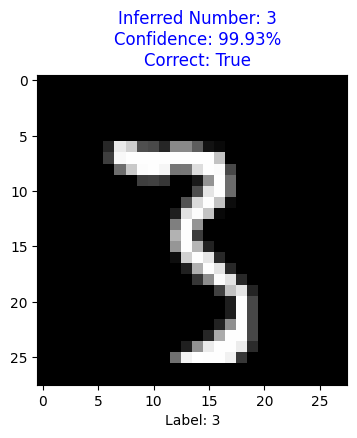

In [19]:

import mnist
import numpy as np
import argparse

import matplotlib.pyplot as plt
from termcolor import colored
import pickle

#parser = argparse.ArgumentParser()
#parser.add_argument("-i", "--index", help="The index of a test image.", type=int, required=True)
#index = int(vars(parser.parse_args())["index"])

index = 2011

test_images = (mnist.test_images() / 255) - 0.5
test_labels = mnist.test_labels()
img = test_images[index]
label = test_labels[index]

with open("model_saved.bin", "rb") as model:
  cnn = pickle.load(model)

fig = plt.figure(figsize=(4, 5))

O = cnn.feedforward(img)
inference = np.argmax(O)
confidence = O[label] * 100 # the confidence of it being from the right class
# could also define: the confidence of being from the class the classifier sees as most likely
correct = "True" if inference == label else "False"
cmap = plt.get_cmap("gray") if inference == label else plt.get_cmap("Reds")
color = "blue" if inference == label else "red"

title = "Inferred Number: {}\nConfidence: {:02.2f}%\nCorrect: {}".format(inference, confidence, correct)
sub = fig.add_subplot(1, 1, 1, xlabel="Label: {}".format(label))
sub.text(14, -1, title, ha="center", va="bottom", size="large", color=color)
sub.imshow(img, cmap=cmap)

plt.show()


## 5. Summary <a class="anchor" id="fifth-bullet"></a>

At this point, all of you should have seen a working CNN code. This time we used our own code, but next time we will see how to use a professional Neural Network library such as Keras/ Tensorflow.



